In [788]:
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [789]:
data = pd.read_csv('Hurricane.csv')

In [790]:
print(data.head())

                           Name  Season               Month  \
0                  Hurricane #3    1853   August, September   
1  "1856 Last Island Hurricane"    1856              August   
2                  Hurricane #6    1866  September, October   
3                  Hurricane #7    1878  September, October   
4                  Hurricane #2    1880              August   

   Max. sustained winds(mph)  Minimum pressure(mbar)  
0                        150                     924  
1                        150                     934  
2                        140                     938  
3                        140                     938  
4                        150                     931  


In [791]:
data.columns = ['Name', 'Season', 'Month', 'mph', 'mbar']

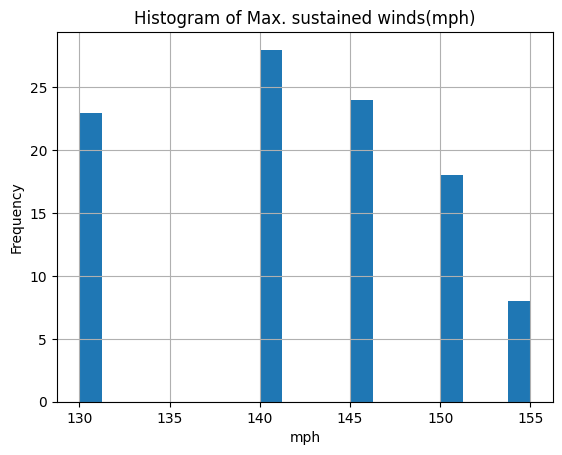

In [792]:
data['mph'].hist(bins=20)
plt.xlabel('mph')
plt.ylabel('Frequency')
plt.title('Histogram of Max. sustained winds(mph)')
plt.show()

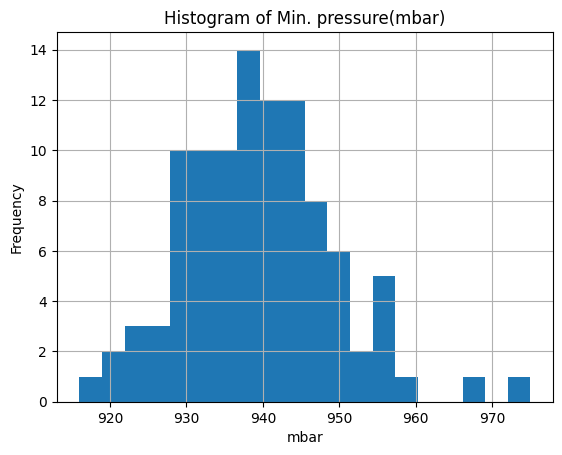

In [793]:
data['mbar'].hist(bins=20)
plt.xlabel('mbar')
plt.ylabel('Frequency')
plt.title('Histogram of Min. pressure(mbar)')
plt.show()

### (a) With a 1% level of significance conduct t-test for correlation coefficient between “Max. sustained winds(mph)” and “Minimum pressure(mbar)”.

#### Preprocessing the data

In [794]:
# min max scaling numerical data
mph_org = data['mph']
mbar_org = data['mbar']
data['mph'] = (data['mph'] - data['mph'].min()) / (data['mph'].max() - data['mph'].min())
data['mbar'] = (data['mbar'] - data['mbar'].min()) / (data['mbar'].max() - data['mbar'].min())

#### t-test

In [795]:
# Calculating mean
mean_mph = data['mph'].mean()
mean_mbar = data['mbar'].mean()

print(f"Mean of Max Sustained Winds: {mean_mph}")
print(f"Mean of Minimum Pressure: {mean_mbar}")

# Calculating covariance
covariance = sum((data['mph'] - mean_mph) * (data['mbar'] - mean_mbar)) / (len(data) - 1)

print(f"Covariance: {covariance}")

# Calculating standard deviation
std_dev_mph = math.sqrt(sum((data['mph'] - mean_mph) ** 2) / (len(data) - 1))
std_dev_mbar = math.sqrt(sum((data['mbar'] - mean_mbar) ** 2) / (len(data) - 1))

print(f"Standard Deviation of Max Sustained Winds: {std_dev_mph}")
print(f"Standard Deviation of Minimum Pressure: {std_dev_mbar}")

# Calculating correlation
correlation = covariance / (std_dev_mph * std_dev_mbar)

print(f"Correlation: {correlation}")

# t-test
n = len(data)
t = correlation * math.sqrt(n - 2) / math.sqrt(1 - correlation ** 2)

print(f"t-test: {t}")

# range: mean - t * std_dev, mean + t * std_dev
t_value = stats.t.ppf(0.995, n-2)

print(f"t-value: {t_value}")

if abs(t) > t_value:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

# p-value
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))

print("Degree of Freedom:", n-2)

print(f"p-value: {p}")

# Conclusion
if p < 0.01:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

Mean of Max Sustained Winds: 0.4752475247524752
Mean of Minimum Pressure: 0.3962074173519046
Covariance: -0.02556939083738882
Standard Deviation of Max Sustained Winds: 0.31349830640501375
Standard Deviation of Minimum Pressure: 0.16865644252611453
Correlation: -0.4835954956356637
t-test: -5.497270157344807
t-value: 2.6264054572808275
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure
Degree of Freedom: 99
p-value: 3.009918618790408e-07
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure


### (b) With a 5% level of significance test if the “Max. sustained winds(mph)” of hurricane depends on the month of its occurrence.

#### Preprocessing the data

In [796]:
# cleaning Month column
data['Month'] = data['Month'].str.strip()
data['Month'] = data['Month'].str.replace(',', ' ')
data['Month'] = data['Month'].str.replace('-', ' ') 
data['Month'] = data['Month'].str.replace('Aug', 'August') 
data['Month'] = data['Month'].str.replace(r'\d+', '', regex=True)  
data['Month'] = data['Month'].str.replace('Augustust', 'August') 

data['Month']

0       August  September
1                  August
2      September  October
3      September  October
4                  August
              ...        
96              October  
97     August  September 
98                August 
99     August  September 
100           September  
Name: Month, Length: 101, dtype: object

In [797]:
# splitting one row into multiple rows if it contains multiple months
data['Month'] = data['Month'].str.split()
data = data.explode('Month')

data

,Name,Season,Month,mph,mbar
0,Hurricane #3,1853,August,0.8,0.135593
0,Hurricane #3,1853,September,0.8,0.135593
1,"""1856 Last Island Hurricane""",1856,August,0.8,0.305085
2,Hurricane #6,1866,September,0.4,0.372881
2,Hurricane #6,1866,October,0.4,0.372881
...,...,...,...,...,...
97,Hurricane Fabian,2003,September,0.6,0.389831
98,Hurricane Charley,2004,August,0.8,0.423729
99,Hurricane Frances,2004,August,0.6,0.322034
99,Hurricane Frances,2004,September,0.6,0.322034


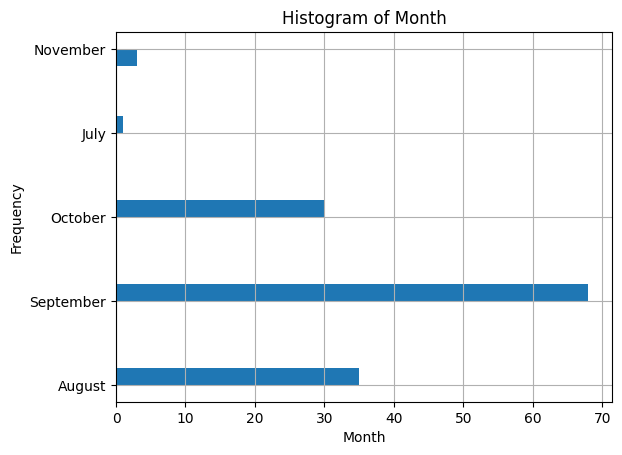

In [798]:
data['Month'].hist(bins=20, orientation='horizontal')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month')
plt.show()

<Axes: xlabel='Month'>

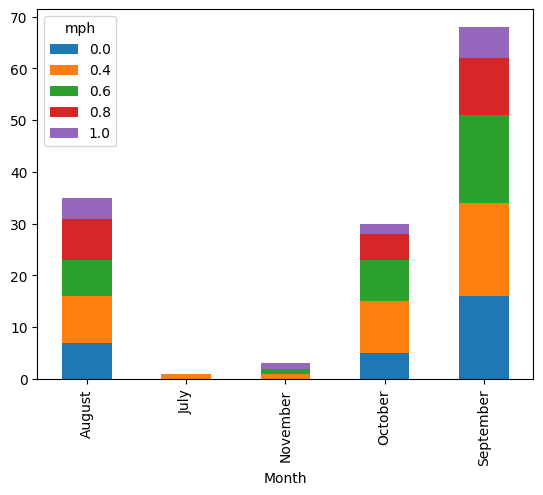

In [799]:
contingency_table = pd.crosstab(data['Month'], data['mph'])
contingency_table.plot(kind='bar', stacked=True)

#### Chi Square test

In [800]:
month_total = contingency_table.sum(axis=1)
mph_total = contingency_table.sum(axis=0)
contingency_total = contingency_table.values.sum()

print("month_total:", month_total)
print("mph_total:", mph_total)
print("contingency_total:", contingency_total)

month_total: Month
August       35
July          1
November      3
October      30
September    68
dtype: int64
mph_total: mph
0.0    28
0.4    39
0.6    33
0.8    24
1.0    13
dtype: int64
contingency_total: 137


In [801]:
expected_frequency = pd.DataFrame(index=contingency_table.index, columns=contingency_table.columns)

for i in contingency_table.index:
    for j in contingency_table.columns:
        expected_frequency.at[i, j] = (month_total[i] * mph_total[j]) / contingency_total

print("Expected Frequency:")
print(expected_frequency)

Expected Frequency:
mph             0.0        0.4        0.6        0.8       1.0
Month                                                         
August     7.153285   9.963504   8.430657   6.131387  3.321168
July        0.20438   0.284672   0.240876   0.175182  0.094891
November   0.613139   0.854015   0.722628   0.525547  0.284672
October    6.131387   8.540146   7.226277   5.255474  2.846715
September  13.89781  19.357664  16.379562  11.912409  6.452555


In [802]:
# Chi-square test
chi_square = 0

for i in contingency_table.index:
    for j in contingency_table.columns:
        observed = contingency_table.at[i, j]
        expected = expected_frequency.at[i, j]
        chi_square += (observed - expected) ** 2 / expected

print(f"Chi-square: {chi_square}")

Chi-square: 7.971634778620072


In [803]:
rows, cols = contingency_table.shape
df = (rows - 1) * (cols - 1)

print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 16


In [804]:
chi_square_critical = stats.chi2.ppf(0.95, df)

print(f"Chi-square Critical: {chi_square_critical}")

if abs(chi_square) > chi_square_critical:
    print("Reject the null hypothesis; there is a significant relationship between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant relationship between Month and Max Sustained Winds")

Chi-square Critical: 26.29622760486423
Accept the null hypothesis; there is no significant relationship between Month and Max Sustained Winds


In [805]:
# p-value
p = 1 - stats.chi2.cdf(chi_square, df=df)

print(f"p-value: {p}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis; there is a significant association between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant association between Month and Max Sustained Winds")

p-value: 0.9497063344388978
Accept the null hypothesis; there is no significant association between Month and Max Sustained Winds


#### Further processing of 'Month' column

In [806]:
# converting months into relative ordinal values
data['Month'] = pd.Categorical(data['Month'], ordered=True, categories=['July', 'August', 'September', 'October', 'November'])
data['Month'] = data['Month'].cat.codes

print(data['Month'])

0      1
0      2
1      1
2      2
2      3
      ..
97     2
98     1
99     1
99     2
100    2
Name: Month, Length: 137, dtype: int8


#### t-test

In [807]:
# t-test
# calculating mean
mean_month = data['Month'].mean()

print(f"Mean of Month: {mean_month}")

# calculating covariance
covariance = sum((data['Month'] - mean_month) * (data['mph'] - mean_mph)) / (len(data) - 1)

print(f"Covariance: {covariance}")

# calculating standard deviation
std_dev_month = math.sqrt(sum((data['Month'] - mean_month) ** 2) / (len(data) - 1))

print(f"Standard Deviation of Month: {std_dev_month}")

# calculating correlation
correlation = covariance / (std_dev_month * std_dev_mph)

print(f"Correlation: {correlation}")

# t-test
n = len(data)
t = correlation * math.sqrt(n - 2) / math.sqrt(1 - correlation ** 2)

print(f"t-test: {t}")

# range: mean - t * std_dev, mean + t * std_dev
t_value = stats.t.ppf(0.975, n-2)

print(f"t-value: {t_value}")

if abs(t) > t_value:
    print("Reject the null hypothesis; there is a significant correlation between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds")

# p-value
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))

print("Degree of Freedom:", n-2)

print(f"p-value: {p}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis; there is a significant correlation between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds")

Mean of Month: 1.9927007299270072
Covariance: 0.002157578359811076
Standard Deviation of Month: 0.7717088597331507
Correlation: 0.008918214059209612
t-test: 0.10362440452941338
t-value: 1.977692277222804
Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds
Degree of Freedom: 135
p-value: 0.9176212021770054
Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds


### With a 10% level of significance conduct test if “Max. sustained winds(mph)” follows a Poisson distribution.

In [808]:
# scaling_factor = 2

# # scaling mph
# data['mph'] = data['mph'] // scaling_factor

In [809]:
# scaling_factor = 2

# data['mph'] = data['mph'] * scaling_factor
# data['mph'] = data['mph'].astype(int)
# data['mph']

In [810]:
# how many times each wind occurred
mph_count = mph_org.value_counts()

print("mph_count:")
print(mph_count)

mph_count:
mph
140    28
145    24
130    23
150    18
155     8
Name: count, dtype: int64


In [811]:
mean_mph_scaled = mph_org.mean()

In [812]:
# expected frequencies using Poisson distribution
expected_frequency = {}
n = len(data)

# print("Total Observations:", n)

for i in mph_count.index:
    poisson_prob = stats.poisson.pmf(i, mean_mph_scaled)
    # poisson_prob = (mean_mph_scaled ** i) * math.exp(-mean_mph_scaled) / math.factorial(i)
    expected_frequency[i] = poisson_prob * n 

print("Expected Frequency:")
print(expected_frequency)

Expected Frequency:
{140: 4.558981382104089, 145: 4.384478177902847, 130: 2.87102176618746, 150: 3.550851929140381, 155: 2.4355231422068546}


In [813]:
chi_square = 0

for i in mph_count.index:
    observed = mph_count[i]
    expected = expected_frequency[i]
    chi_square += (observed - expected) ** 2 / expected

print(f"Chi-square: {chi_square}")

Chi-square: 420.92001770063024


In [814]:
df = len(mph_count) - 2

print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 3


In [815]:
chi_square_critical = stats.chi2.ppf(0.90, df)

print(f"Chi-square Critical: {chi_square_critical}")

if abs(chi_square) > chi_square_critical:
    print("Reject the null hypothesis; the distribution of Max Sustained Winds is not Poisson")
else:
    print("Accept the null hypothesis; the distribution of Max Sustained Winds is Poisson")

Chi-square Critical: 6.251388631170325
Reject the null hypothesis; the distribution of Max Sustained Winds is not Poisson
